<a href="https://colab.research.google.com/github/GenAIUnplugged/langGraph_series/blob/main/basic_langgraph_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install -U langgraph langsmith langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 3.5 MB/s eta 0:00:00


In [11]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [12]:
from google.colab import userdata
import os
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

In [16]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")

In [17]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [18]:
graph_builder.add_edge(START, "chatbot")

In [19]:
graph = graph_builder.compile()

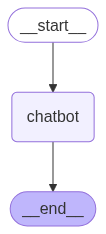

In [20]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [21]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: Hello
Assistant: Hello! 👋 

How can I help you today? 😊

User: who is the president of france
Assistant: The president of France is **Emmanuel Macron**. 

User: who is the prime minister of india
Assistant: The Prime Minister of India is **Narendra Modi**. 

User: which is the oldest city in the world
Assistant: There's no single definitive answer to the question of "oldest city in the world." 

It depends on how you define "city."  

* **Continuous habitation:**

If you consider a city as a place with continuous habitation from ancient times, then some contenders include:

* **Jericho, Palestine:** Archaeological evidence suggests Jericho has been inhabited for over 11,000 years, making it a strong candidate. 
* **Damascus, Syria:**  Also boasts a long history, with evidence of settlement dating back over 10,000 years.

* **Urban development:**

If you define a city by its urban development and infrastructure, then other locations might be considered:

* **Çatalhöyük, Turkey:** 